In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.path as mpath
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
from starkhelium import *
from tqdm import trange, tqdm
import os

au_to_ghz = 10**-9 * E_h /h
scl = au_to_ghz
au_to_cm = E_h / (100 * h * c)

# Stark map - crossed fields

### Calculate Stark interaction matrix, $H_S$

In [4]:
# In an electric field (with B=0)
# quantum numbers
nmin = 5
nmax = 6
S = 1
n_vals, L_vals, m_vals = get_nlm_vals(nmin, nmax)
J_vals = get_J_vals(S, L_vals, 1)
# quantum defects
neff = n_vals - get_qd(S, n_vals, L_vals, J_vals)
# energy levels
En = En_0(neff) #W_n(S, n_vals, L_vals, J_vals)
# field-free Hamiltonian
H_0 = np.diag(En)
# find the off-diagonal terms of the Stark interaction matrix
mat_S = stark_matrix(neff, L_vals, m_vals, field_orientation='crossed')
#mat_S_para = stark_matrix(neff, L_vals, m_vals, field_orientation='parallel')
#field_angle = (90/90) * np.pi/2
#mat_S = np.cos(field_angle) * mat_S_para + np.sin(field_angle) * mat_S_cros
#mat_S_transition = []
#mat_S_transition.append( stark_matrix(neff, L_vals, m_vals, field_orientation='parallel', dm_allow=[0]) )
#mat_S_transition.append( stark_matrix(neff, L_vals, m_vals, field_orientation='parallel', dm_allow=[+1]) )
#mat_S_transition.append( stark_matrix(neff, L_vals, m_vals, field_orientation='parallel', dm_allow=[-1]) )

Calculating Stark terms: 100%|██████████| 61/61 [00:02<00:00, 24.06it/s]


### Diagonalise the full Hamiltonian

In [11]:
# specify the electric field
field = np.linspace(3.5*10**5, 6.0*10**5, 501) # V /cm
field_au = field * 100 / (En_h_He/(e*a_0_He))
# specify the magnetic field (in Telsa)
B_z = 0.0
# (in atomic units)
B_z_au = B_z / (hbar/(e*a_0_He**2))
# Zeeman interaction Hamiltonian
H_Z = np.diag(E_zeeman(m_vals, B_z_au))
# diagonalise for each field
eig_vals, eig_vecs = stark_map_vec(H_0, mat_S, field_au, H_Z=H_Z)

diagonalise Hamiltonian: 100%|██████████| 501/501 [00:00<00:00, 2888.28it/s]


### Plot the Stark map

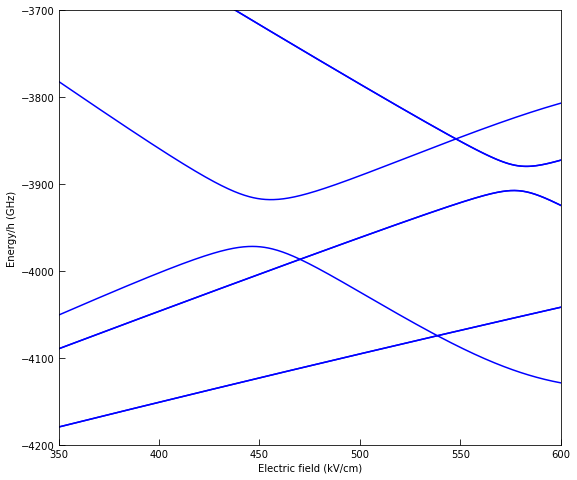

In [16]:
plt.figure(figsize=(9,8))
ax = plt.plot(field/10**3, eig_vals*au_to_cm, 'b')
plt.xlabel('Electric field (kV/cm)')
plt.ylabel('Energy/h (GHz)')
plt.xlim(350, 600)
plt.ylim(-4200, -3700)
plt.gca().tick_params(direction='in', length=6)

#plt.savefig('Stark-Zeeman-map.pdf')